<a href="https://colab.research.google.com/github/dfariba/Aggregated-Wind-Farm-Power-Prediction-using-Statistical-Methods/blob/main/ARIMA_with_walking_forward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Aggregated Wind Farm Power Production Located in Belgium
Source of data: www.elia.be

ARIMA model using a walking-forward validation

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\98990\AppData\Local\Temp\ipykernel_20660\2481376646.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
# load dataset
series = read_csv('AggregatedWindFarm_Belgium.csv', header=0, index_col=0, parse_dates=True)
series.index = series.index.to_period('M')

In [ ]:
# split into train and test sets
X = series.values
size = int(len(X)*0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [ ]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output =  model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [ ]:
# evaluate forecasats
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' %rmse)

Test RMSE: 65.902


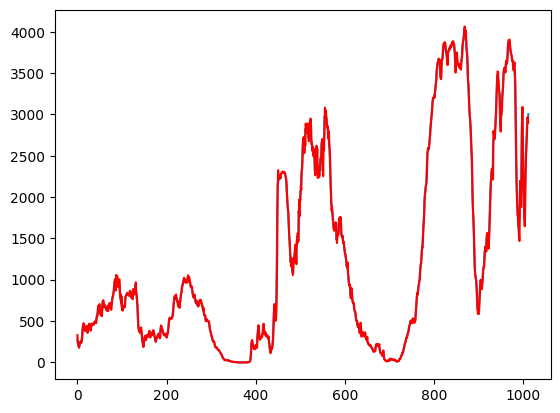

In [ ]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')